# 03 Feature Engineering - Energy Prediction<a id=''></a>

## 1. Introduction <a id='1'></a>

The main task for the notebook is to perform feature engineering for the cleaned and merged datatset.

## 2. Feature Engineering <a id='2'></a>

### 2.1 Imports <a id='2.1'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

# Metrics & Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
%matplotlib inline

import pandas as pd
import numpy as np
import os
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import datetime

In [2]:
path = '../data/'
file_name = 'mlmodeldata.csv'
full_path = path + file_name
df = pd.read_csv(full_path, index_col=[0])

In [3]:
df.head()

,building_id,loc_id,subUsage,sqm,Unnamed: 0_x,index,timestamp,meter_reading,Unnamed: 0_y,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
0,789,7.0,College Classroom,6000.0,0,0,2016-01-01 00:00:00,516.43,17544,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
1,789,7.0,College Classroom,6000.0,1,1,2016-01-01 01:00:00,519.40,17545,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
2,789,7.0,College Classroom,6000.0,2,2,2016-01-01 02:00:00,501.68,17546,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
3,789,7.0,College Classroom,6000.0,3,3,2016-01-01 03:00:00,507.87,17547,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
4,789,7.0,College Classroom,6000.0,4,4,2016-01-01 04:00:00,509.45,17548,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


In [4]:
# columns to be removed
columns = ['loc_id', 'Unnamed: 0_x', 'index', 'Unnamed: 0_y']

df = df.drop(columns=columns)

In [5]:
df.head()

,building_id,subUsage,sqm,timestamp,meter_reading,site_id,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed
0,789,College Classroom,6000.0,2016-01-01 00:00:00,516.43,Ottawa,-2.2,-3.6,1014.5,270.0,2.1
1,789,College Classroom,6000.0,2016-01-01 01:00:00,519.40,Ottawa,-2.3,-3.8,1014.5,260.0,2.1
2,789,College Classroom,6000.0,2016-01-01 02:00:00,501.68,Ottawa,-2.8,-4.0,1014.0,260.0,1.5
3,789,College Classroom,6000.0,2016-01-01 03:00:00,507.87,Ottawa,-3.0,-3.8,1014.0,260.0,1.5
4,789,College Classroom,6000.0,2016-01-01 04:00:00,509.45,Ottawa,-3.3,-3.8,1013.5,230.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349756 entries, 0 to 349755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     349756 non-null  int64  
 1   subUsage        349756 non-null  object 
 2   sqm             349756 non-null  float64
 3   timestamp       349756 non-null  object 
 4   meter_reading   349756 non-null  float64
 5   site_id         349756 non-null  object 
 6   airTemperature  336171 non-null  float64
 7   dewTemperature  335252 non-null  float64
 8   seaLvlPressure  335492 non-null  float64
 9   windDirection   336171 non-null  float64
 10  windSpeed       336171 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.0+ MB


In [7]:
# fill airTemperature,dewTemperature,seaLvlPressure, windDirection, windSpeed missing values with interpolation
df.airTemperature.interpolate(method='linear', inplace=True)
df.dewTemperature.interpolate(method='linear', inplace=True)
df.seaLvlPressure.interpolate(method='linear', inplace=True)
df.windDirection.interpolate(method='linear', inplace=True)
df.windSpeed.interpolate(method='linear', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349756 entries, 0 to 349755
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     349756 non-null  int64  
 1   subUsage        349756 non-null  object 
 2   sqm             349756 non-null  float64
 3   timestamp       349756 non-null  object 
 4   meter_reading   349756 non-null  float64
 5   site_id         349756 non-null  object 
 6   airTemperature  349756 non-null  float64
 7   dewTemperature  349756 non-null  float64
 8   seaLvlPressure  349756 non-null  float64
 9   windDirection   349756 non-null  float64
 10  windSpeed       349756 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 32.0+ MB


In [9]:
df = df[df['meter_reading'] != 0]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341735 entries, 0 to 348505
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   building_id     341735 non-null  int64  
 1   subUsage        341735 non-null  object 
 2   sqm             341735 non-null  float64
 3   timestamp       341735 non-null  object 
 4   meter_reading   341735 non-null  float64
 5   site_id         341735 non-null  object 
 6   airTemperature  341735 non-null  float64
 7   dewTemperature  341735 non-null  float64
 8   seaLvlPressure  341735 non-null  float64
 9   windDirection   341735 non-null  float64
 10  windSpeed       341735 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 31.3+ MB


In [11]:
# Add features - timestamp features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df.timestamp.dt.month
df['weekday'] = df.timestamp.dt.weekday
df['hour'] = df.timestamp.dt.hour
df['year'] = df.timestamp.dt.year

### 2.2 Data Pool Creation<a id='2.2'></a>

In [12]:
df.building_id.nunique()

20

We have 20 buildings' meter_data in our dataset. For model accuracy, each building's features will be put into a machine learning model for the meter reading prediction. We select building ID 789 as our target for analysis. At the mean time, for better accuracy, the dataset for the building will be split based on Canadian seasons.

In [13]:
# function to create a 2016 and 2017 dataframe for the selected building
def create_buildingDataframe_year(df, building_id):
    df_building = df[df.building_id == building_id]
    df_building = df_building.drop(columns=['building_id', 'sqm'])
    df_2016 = df_building[df_building.year == 2016]
    df_2016.drop(columns=['year'], inplace=True)
    df_2017 = df_building[df_building.year == 2017]
    df_2017.drop(columns=['year'], inplace=True)
    return df_2016, df_2017

def create_buildingDataframe_seasons(df):
    # return seasonal data: winter, spring, summer, fall
    winter = [12, 1, 2]
    spring = [x for x in range(3,6)]
    summer = [x for x in range(6,9)]
    fall = [x for x in range(10, 12)]
    
    df_winter = df[df.month.isin(winter)]
    df_spring = df[df.month.isin(spring)]
    df_summer = df[df.month.isin(summer)]
    df_fall = df[df.month.isin(fall)]
    
    return df_winter, df_spring, df_summer, df_fall
    

### 2.2.1 Building ID 789 Selection - Annual Data - Long Term<a id='2.2'></a>

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


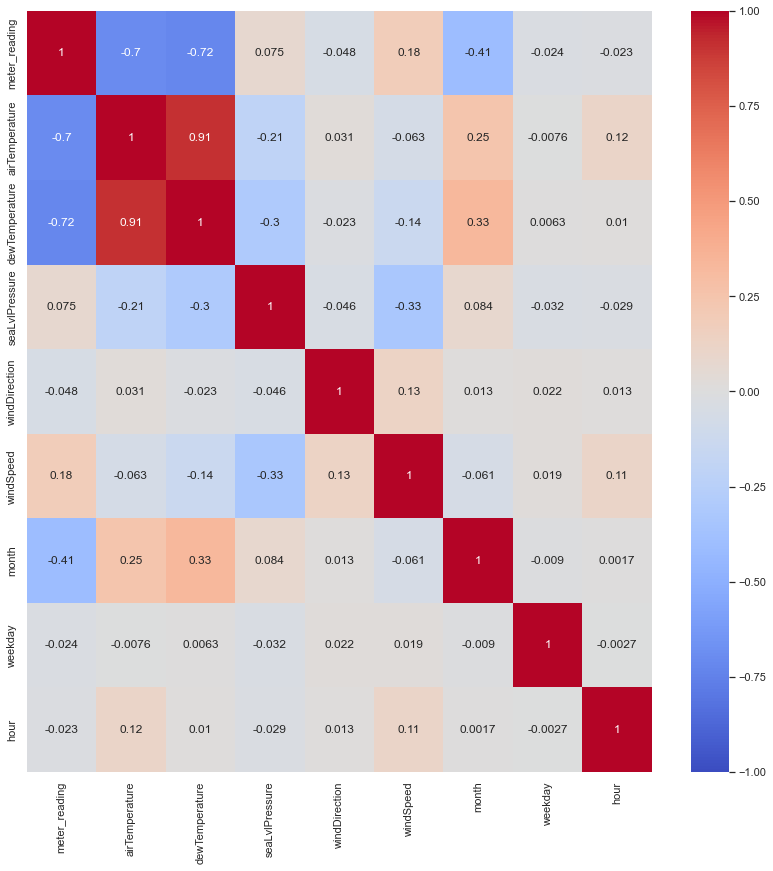

In [14]:
df_2016, df_2017 = create_buildingDataframe_year(df, 789)
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(df_2016.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.savefig("..\\figures\\Building_789_2016_datacorr.png", dpi=72, bbox_inches='tight')

### 2.2.2 Building ID 789 Selection - Seasonal Data - Short Term<a id='2.2'></a>

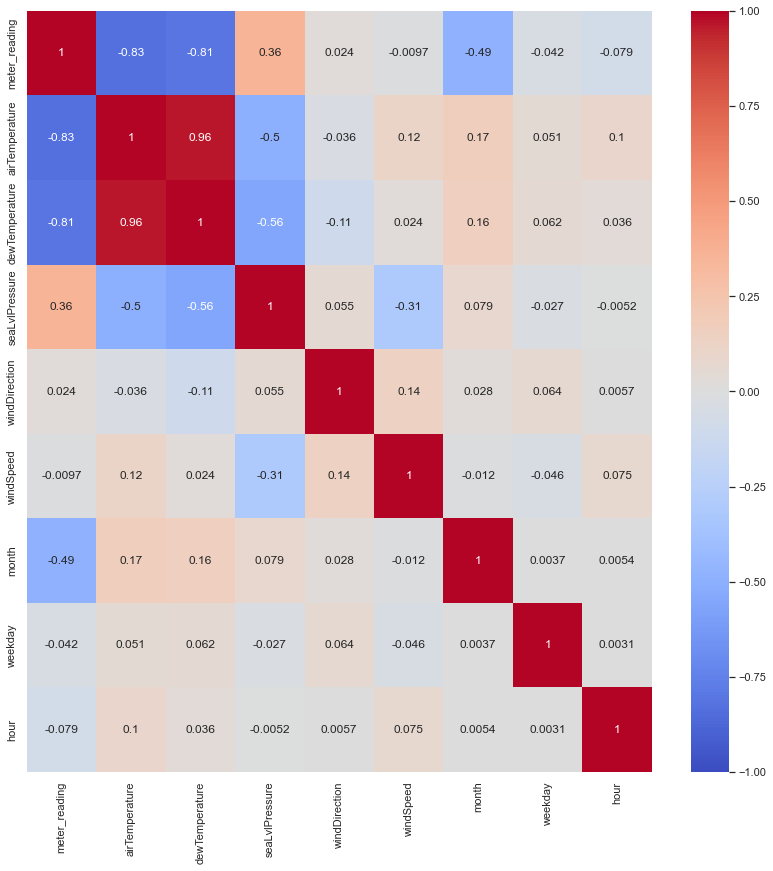

In [15]:
df_2016_winter,df_2016_spring, df_2016_summer, df_2016_fall = create_buildingDataframe_seasons(df_2016)
df_2017_winter,df_2017_spring, df_2017_summer, df_2017_fall = create_buildingDataframe_seasons(df_2017)

sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(df_2016_winter.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.savefig("..\\figures\\Building_789_2016_wintercorr.png", dpi=72, bbox_inches='tight')

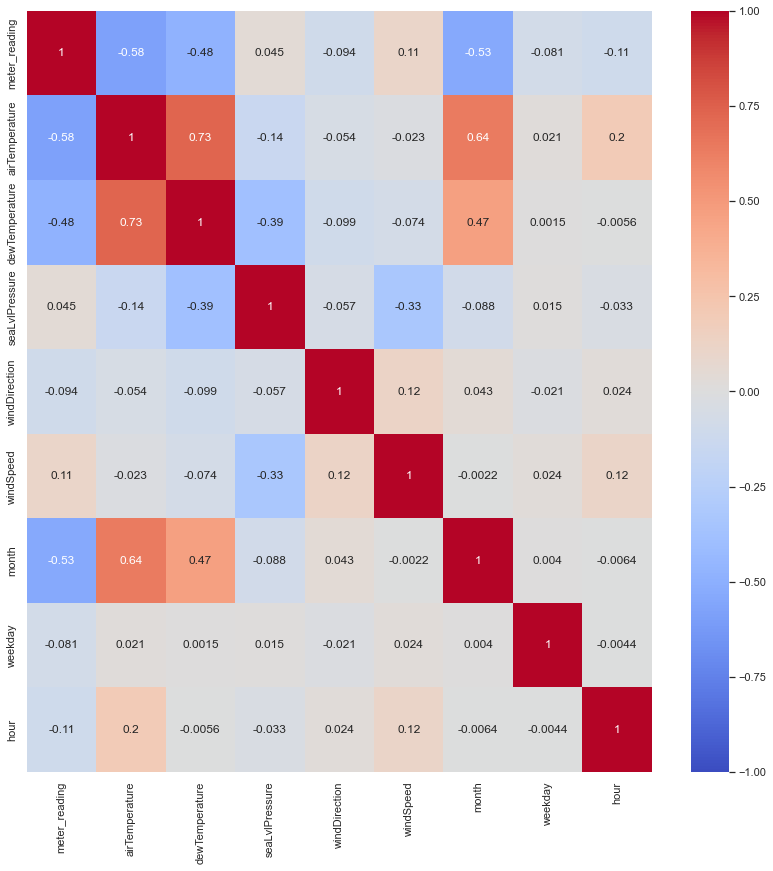

In [16]:
sns.set(rc={'figure.figsize': (14, 14)})
sns.heatmap(df_2016_spring.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.savefig("..\\figures\\Building_789_2016_springcorr.png", dpi=72, bbox_inches='tight')

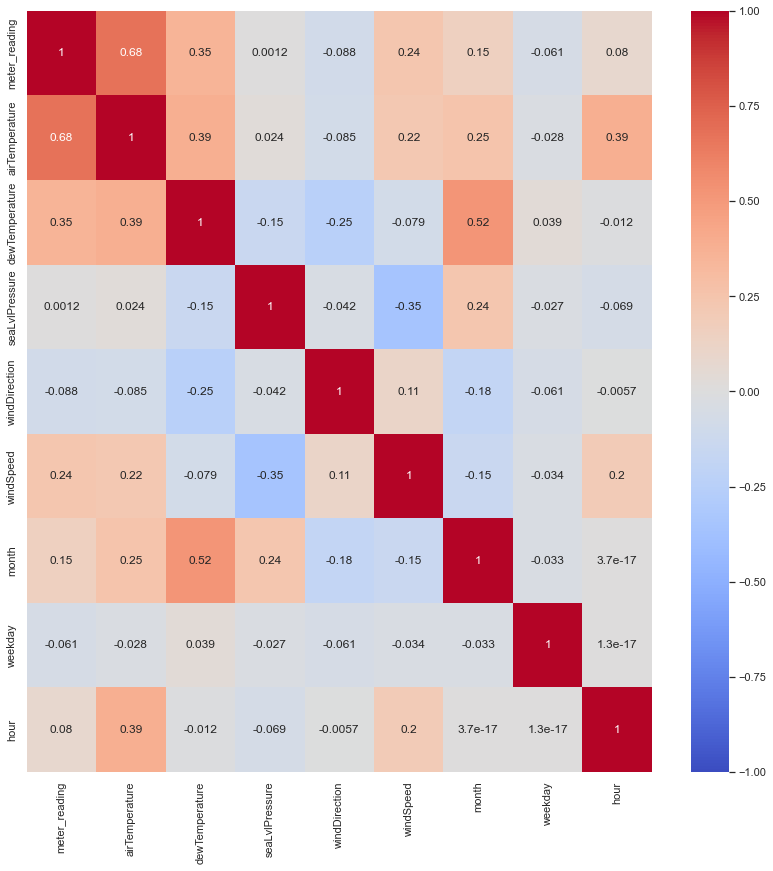

In [17]:
sns.set(rc={'figure.figsize': (14, 14)})
sns.heatmap(df_2016_summer.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.savefig("..\\figures\\Building_789_2016_summercorr.png", dpi=72, bbox_inches='tight')

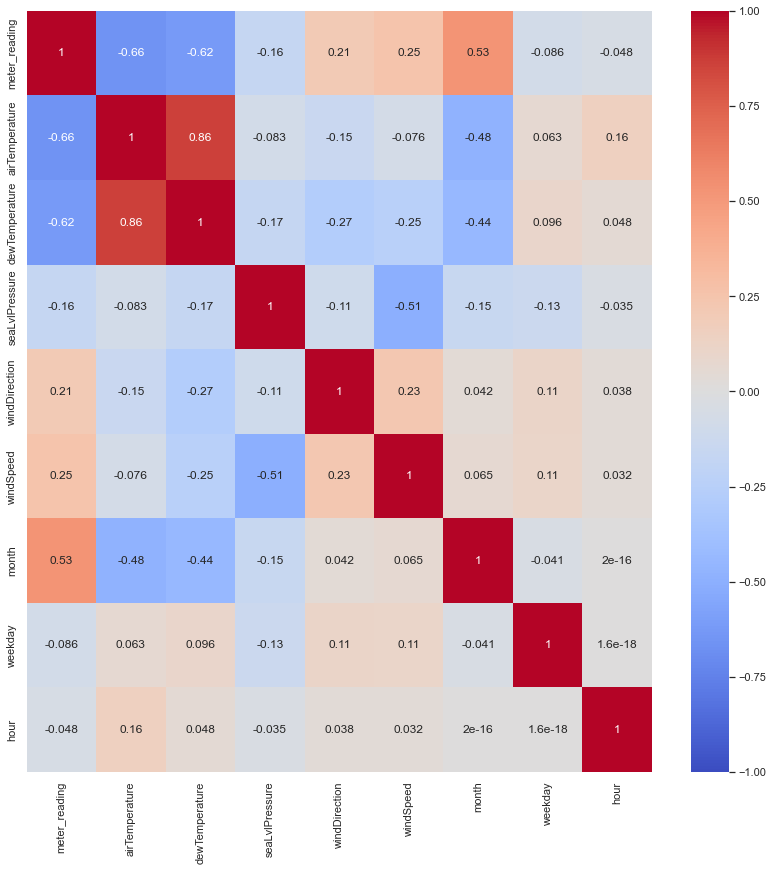

In [18]:
sns.set(rc={'figure.figsize': (14, 14)})
sns.heatmap(df_2016_fall.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.savefig("..\\figures\\Building_789_2016_fallcorr.png", dpi=72, bbox_inches='tight')

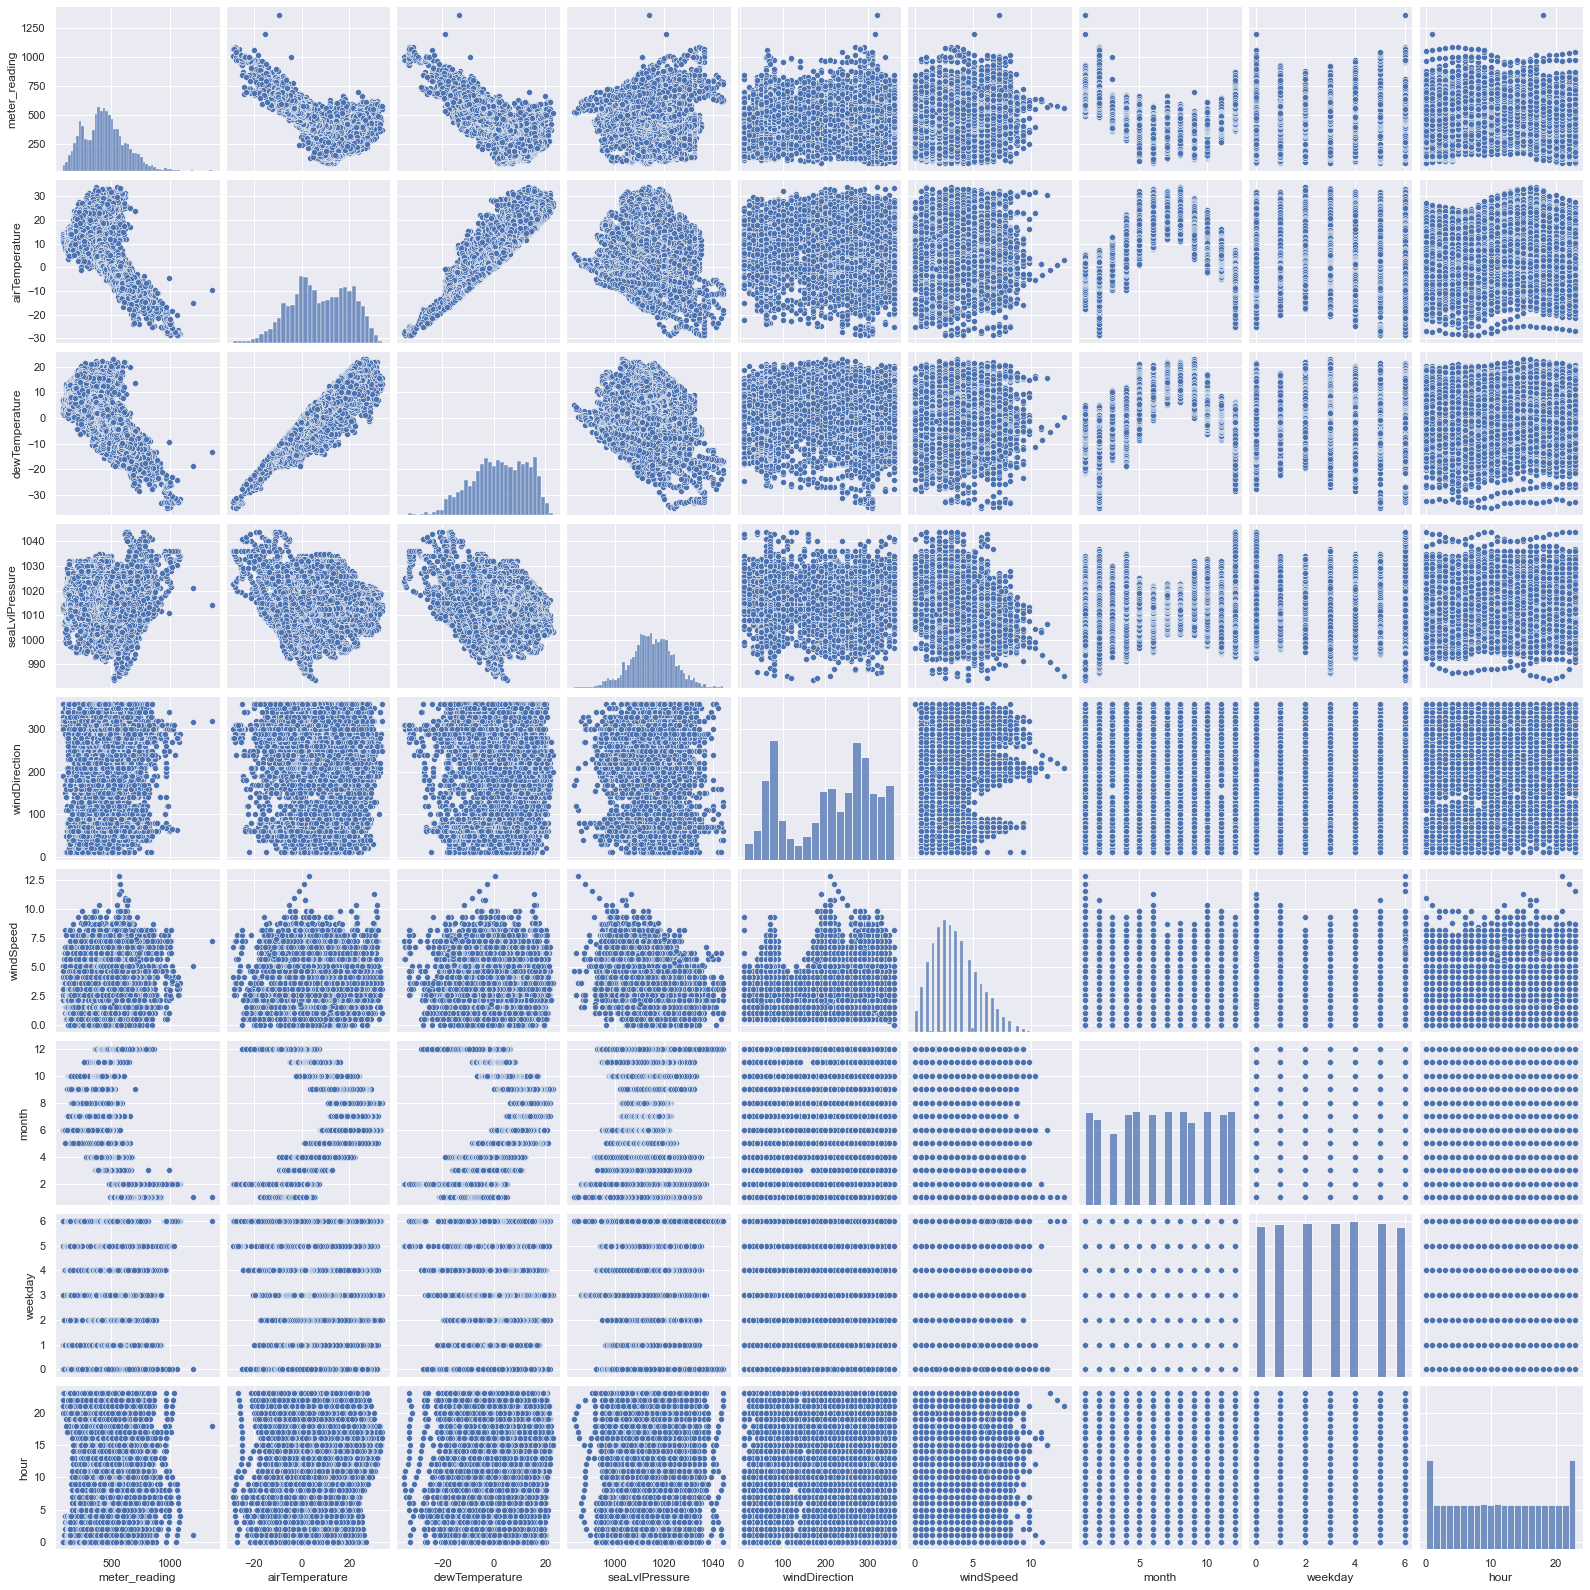

In [19]:
sns.pairplot(df_2016)

### 2.3 Feature Selection - Annual Data<a id='2.2'></a>

In [20]:
# selected features, note that 2016 is used as training data
df_2016.columns

Index(['subUsage', 'timestamp', 'meter_reading', 'site_id', 'airTemperature',
       'dewTemperature', 'seaLvlPressure', 'windDirection', 'windSpeed',
       'month', 'weekday', 'hour'],
      dtype='object')

In [21]:
X_columns = ['airTemperature', 'dewTemperature', 'seaLvlPressure', 'windDirection',
          'windSpeed', 'month', 'weekday', 'hour']
y_column = 'meter_reading'

In [22]:
df_2016.shape

(8524, 12)

In [23]:
# function to get data to input into ML model
def get_data(df, x_columns, y_column):
    X_year = df[x_columns]
    y_year = df[y_column]
    return X_year, y_year

In [24]:
X_2016, y_2016 = get_data(df_2016, X_columns, y_column)
X_2017, y_2017 = get_data(df_2017, X_columns, y_column)

### 2.4 Data Splitting - Annual Data<a id='2.4'></a>

In [25]:
# split data, note that training and testing data come from 2016 data
X_train, X_test, y_train, y_test = train_test_split(X_2016, y_2016, test_size = 0.2, random_state = 246)

## 3. Modeling - Annual Data (Long Term Prediction)  <a id='3'></a>

### 3.1 Linear Regression<a id='3.1'></a>

In [26]:
# define pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

lr_pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression, k = 7),
    LinearRegression())

# fit model
lr_pipe.fit(X_train, y_train)

# make prediction
y_tr_pred = lr_pipe.predict(X_train)
y_te_pred = lr_pipe.predict(X_test)

#### 3.1.1 Linear Regression Result<a id='3.1.1'></a>

In [27]:
# function to print and return model result
def get_modelresult(y_train, y_tr_pred, y_test, y_te_pred):
    train_r2_score, test_r2_r2_score = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
    mean_train, mean_test = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
    print(f'R Squared result:\ntraining - {round(train_r2_score,3)}, testing - {round(test_r2_r2_score, 3)}')
    print(f'\nMean Abosulte Error result:\ntraining - {round(mean_train, 3)}, testing - {round(mean_test, 3)}')
    return train_r2_score, test_r2_r2_score, mean_train, mean_test

In [28]:
get_modelresult(y_train, y_tr_pred, y_test, y_te_pred)

R Squared result:
training - 0.587, testing - 0.606

Mean Abosulte Error result:
training - 86.786, testing - 85.287


(0.5865826090579919, 0.6056019972300173, 86.78581025337871, 85.28657879019372)

#### 3.1.2 Linear Regression Cross Validation<a id='3.1.2'></a>

In [29]:
lr_cv_results = cross_validate(lr_pipe, X_train, y_train, cv=5)
lr_cv_scores = lr_cv_results['test_score']
lr_cv_scores

array([0.60380659, 0.58948441, 0.58691639, 0.56807737, 0.57393598])

Cross validation on the training data shows the scores are not very good (around 0.56 - 0.61). We will use GridSearchCV to find if we can find better linear regression models.

#### 3.1.3 Linear Regression - Hyper Parameter Search - GridSearchCV<a id='3.1.3'></a>

In [30]:
lr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [31]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}
lr_grid_cv = GridSearchCV(lr_pipe, param_grid = grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=7,
                                                    score_func=<function f_regression at 0x000002964DD4B310>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8]})

In [32]:
lr_score_mean = lr_grid_cv.cv_results_['mean_test_score']
lr_score_std = lr_grid_cv.cv_results_['std_test_score']
lr_cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [33]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

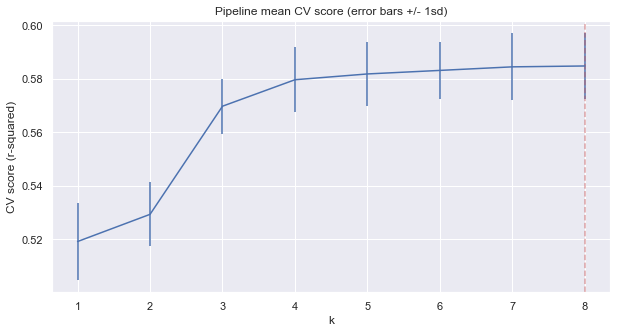

In [34]:
# plot all results with CV scores.
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10,5))
plt.errorbar(lr_cv_k, lr_score_mean, yerr=lr_score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

Even though the above suggest that a good value for k is 8. There was an initial rapid increase with k when k is 2 and 3. The r-square does not improve too much when k is bigger than 4. This is an indication that linear regression model might not be a good model for the prediction. However, for the curiosity, we will do below to see what features have more positive/negative impact on our results.

In [35]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

windSpeed         14.741598
hour               1.087016
weekday           -4.036085
windDirection     -9.480158
seaLvlPressure   -10.427983
month            -34.817775
airTemperature   -54.113611
dewTemperature   -66.056705
dtype: float64

It appears that in the best linear regression model, the meter reading data has positive relationship with hour and wind speed. From engineering point of view, this may make sense from heat and mass transfer. However, as the R square showed that the linear model does not have good accuracy with a R square value around 0.6.

### 3.2 Random Forest Model<a id='3.2'></a>

In [36]:
rf_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

#### 3.2.1 Random Forest Result and Cross Validation<a id='3.2.1'></a>

In [37]:
rf_default_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.94986359, 0.96075064, 0.95885135, 0.94929202, 0.95699043])

#### 3.2.2 Random Forest Hyper Parameter Search - GridSearchCV<<a id='3.2.2'></a>

In [38]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [39]:
rf_grid_cv = GridSearchCV(rf_pipe, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 784,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [40]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.95116889, 0.96163133, 0.95886151, 0.95039068, 0.9579831 ])

In [41]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9560071048453892, 0.004441546050512435)

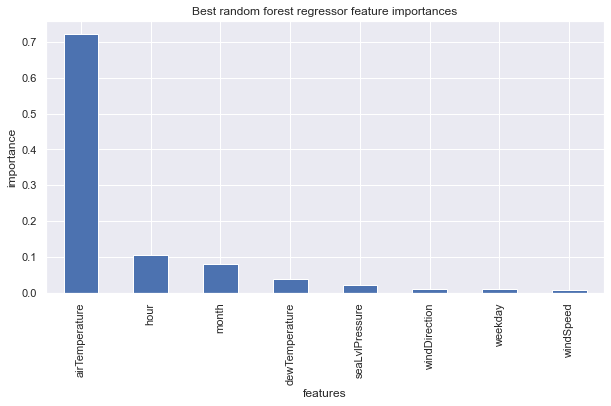

In [42]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

The random forest model shows a better performance comparing with the linear regression model. The model has a R square score of 0.956 in cross validation. The model shows that the temperature, hour and month are top three features that can impact the meter reading.

### 3.3 LightGBM Model - Random Search CV & Grid Search CV<a id='3.3'></a>

In [43]:
import lightgbm as lgbm

lgmb_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    lgbm.LGBMRegressor()
)

#### 3.3.1 LightGBM Model Result and Cross Validation<a id='3.2.1'></a>

In [44]:
lgmb_default_cv_results = cross_validate(lgmb_pipe, X_train, y_train, cv=5)
lgmb_cv_scores = lgmb_default_cv_results['test_score']
lgmb_cv_scores

array([0.94034738, 0.95270663, 0.9481464 , 0.9443709 , 0.95297618])

#### 3.3.2 LightGBM Model Hyper Parameter Search - RandomSearchCV<a id='3.2.2'></a>

In [45]:
lgmb_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'lgbmregressor', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lgbmregressor__boosting_type', 'lgbmregressor__class_weight', 'lgbmregressor__colsample_bytree', 'lgbmregressor__importance_type', 'lgbmregressor__learning_rate', 'lgbmregressor__max_depth', 'lgbmregressor__min_child_samples', 'lgbmregressor__min_child_weight', 'lgbmregressor__min_split_gain', 'lgbmregressor__n_estimators', 'lgbmregressor__n_jobs', 'lgbmregressor__num_leaves', 'lgbmregressor__objective', 'lgbmregressor__random_state', 'lgbmregressor__reg_alpha', 'lgbmregressor__reg_lambda', 'lgbmregressor__silent', 'lgbmregressor__subsample', 'lgbmregressor__subsample_for_bin', 'lgbmregressor__subsample_freq'])

In [46]:
# reference: https://www.kaggle.com/code/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761/notebook
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param = {'lgbmregressor__num_leaves': sp_randint(6, 50), 
             'lgbmregressor__min_child_samples': sp_randint(100, 500), 
             'lgbmregressor__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'lgbmregressor__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'lgbmregressor__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'lgbmregressor__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'lgbmregressor__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [47]:
# fitting model with random search
from sklearn.model_selection import RandomizedSearchCV
lgmb_random_cv = RandomizedSearchCV(lgmb_pipe, param_distributions=param, 
                                    scoring='neg_mean_squared_error',
                                    n_iter=25,
                                    verbose=1)

In [48]:
lgmb_random_cv.fit(X_train, y_train)
lgmb_random_cv.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'lgbmregressor__colsample_bytree': 0.4719665578658498,
 'lgbmregressor__min_child_samples': 131,
 'lgbmregressor__min_child_weight': 0.01,
 'lgbmregressor__num_leaves': 38,
 'lgbmregressor__reg_alpha': 2,
 'lgbmregressor__reg_lambda': 5,
 'lgbmregressor__subsample': 0.35506899202846376}

In [49]:
# use the best model to predict
lgmb_random_best_cv_result = cross_validate(lgmb_random_cv.best_estimator_, X_train, y_train, cv=5)
lgmb_random_best_scores = lgmb_random_best_cv_result['test_score']
lgmb_random_best_scores

array([0.92733002, 0.93835364, 0.93077093, 0.92475911, 0.93839219])

In [50]:
np.mean(lgmb_random_best_scores), np.std(lgmb_random_best_scores)

(0.9319211775689584, 0.005602635773477595)

#### 3.3.2 LightGBM Model Hyper Parameter Search - GridSearchCV<a id='3.3.2'></a>

In [51]:
param_grid = {'lgbmregressor__num_leaves': [6, 10, 20, 30], 
             'lgbmregressor__min_child_weight': [1e-5, 1e2, 1e3, 1e4],
             'lgbmregressor__reg_alpha': [1, 2, 5, 7, 10, 50, 100],
             'lgbmregressor__reg_lambda': [1, 5, 10, 20, 50, 100]}

lgmb_grid_cv = GridSearchCV(lgmb_pipe,
                            param_grid=param_grid, 
                            cv=5, 
                            n_jobs=-1)

In [52]:
lgmb_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('lgbmregressor', LGBMRegressor())]),
             n_jobs=-1,
             param_grid={'lgbmregressor__min_child_weight': [1e-05, 100.0,
                                                             1000.0, 10000.0],
                         'lgbmregressor__num_leaves': [6, 10, 20, 30],
                         'lgbmregressor__reg_alpha': [1, 2, 5, 7, 10, 50, 100],
                         'lgbmregressor__reg_lambda': [1, 5, 10, 20, 50, 100]})

In [53]:
lgmb_grid_cv.best_params_

{'lgbmregressor__min_child_weight': 1e-05,
 'lgbmregressor__num_leaves': 30,
 'lgbmregressor__reg_alpha': 1,
 'lgbmregressor__reg_lambda': 1}

In [54]:
lgmb_grid_best_cv_result = cross_validate(lgmb_grid_cv.best_estimator_, X_train, y_train, cv=5)
lgmb_grid_best_scores = lgmb_grid_best_cv_result['test_score']
lgmb_grid_best_scores

array([0.94256897, 0.95378344, 0.94756481, 0.94469161, 0.95232245])

In [55]:
np.mean(lgmb_grid_best_scores), np.std(lgmb_grid_best_scores)

(0.9481862548829498, 0.004303236252198487)

Overall, the random forest model performed better than LightGBM models. The grid search cv find a better LightGBM models comparing with random search, however it took longer time.

## 4. Model Evaluation  <a id='4'></a> 

In [56]:
model_names = ['Linear Regression', 
               'Random Forest', 
               'LightGBM Model(RS)', 
               'LightGBM Model (GS)']

model_maes = [mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test)),
             mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test)),
             mean_absolute_error(y_test, lgmb_random_cv.best_estimator_.predict(X_test)),
             mean_absolute_error(y_test, lgmb_grid_cv.best_estimator_.predict(X_test))]

model_r2score = [r2_score(y_test, lr_grid_cv.best_estimator_.predict(X_test)),
             r2_score(y_test, rf_grid_cv.best_estimator_.predict(X_test)),
             r2_score(y_test, lgmb_random_cv.best_estimator_.predict(X_test)),
             r2_score(y_test, lgmb_grid_cv.best_estimator_.predict(X_test))]

In [57]:
dic = {'models':model_names,'mae': model_maes, 'r2': model_r2score} 

In [58]:
model_df = pd.DataFrame(dic)

In [59]:
model_df.mae = round(model_df.mae, 2)
model_df.r2 = round(model_df.r2, 2)
model_df

,models,mae,r2
0,Linear Regression,85.14,0.61
1,Random Forest,23.20,0.96
2,LightGBM Model(RS),31.84,0.94
3,LightGBM Model (GS),28.97,0.95


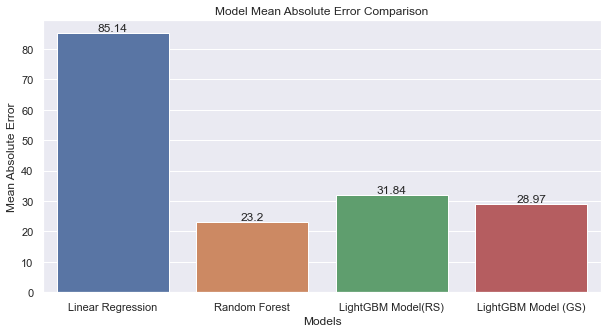

In [60]:
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='models', y='mae', data=model_df)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Mean Absolute Error Comparison')

for i in ax.containers:
    ax.bar_label(i,)
    
    
plt.savefig("..\\figures\\Model Compare 1.png", dpi=72, bbox_inches='tight')

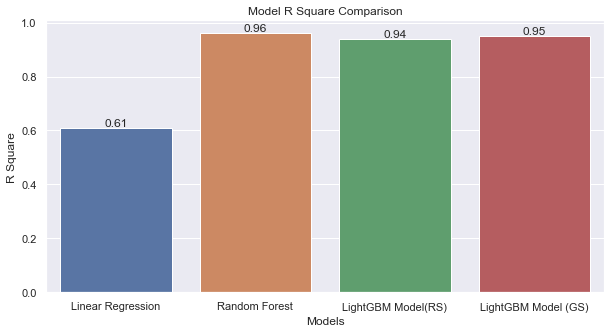

In [61]:
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='models', y='r2', data=model_df)
plt.xlabel('Models')
plt.ylabel('R Square')
plt.title('Model R Square Comparison')
for i in ax.containers:
    ax.bar_label(i,)

plt.savefig("..\\figures\\Model Compare 2.png", dpi=72, bbox_inches='tight')

Base on the data presented, the random forest model with the best parameters is selected to be the best model because it has the lowest MAE value and highest r square value.

## 5. Save Model  <a id='5'></a> 

In [62]:
# functions to save model
def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)

In [63]:
import datetime

best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

model_path = '..\models'
save_file(best_model, 'LongTermEnergyPredction.pkl', model_path)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "..\models\LongTermEnergyPredction.pkl"


## 6. Project Assumptions Study <a id='6'></a> 

### 6.1 Temperature Study <a id='6.1'></a> 

Based on the built model, we want to investigate how change in temperature can affect the meter data reading. In this section, we will simulate 2 different scenarios.
1. Average annual temperature increase by 0.2 degree, 0.4 degree, 0.8 degree, 1.2 degrees, 1.8 degrees, 3 degrees, 5 degrees, 10 degrees, and 15 degrees.
1. Average annual temperature decrease by 0.2 degree, 0.4 degree, 0.8 degree, 1.2 degrees, 1.8 degrees, 3 degrees, 5 degrees, 10 degrees, and 15 degrees.
2. Average annual temperature increase only in spring and summer, and decrease in fall and winter by 0.2 degree, 0.4 degree, 0.8 degree, 1.2 degrees, 1.8 degrees, 3 degrees, 5 degrees, 10 degrees, and 15 degrees.

In [464]:
X_2016.airTemperature.describe()

count    8524.000000
mean        7.955232
std        12.170885
min       -28.800000
25%        -0.900000
50%         7.700000
75%        18.225000
max        33.900000
Name: airTemperature, dtype: float64

The highest temperature in Ottawa is 33.9°C, and the lowest is -28.8°C. The mean temperature in 2016 in Ottawa is 7.95°C.

In [465]:
y_2016.describe()

count    8524.000000
mean      439.755021
std       174.222963
min        81.780000
25%       311.275000
50%       432.140000
75%       546.750000
max      1364.590000
Name: meter_reading, dtype: float64

The energy consumption in Ottawa is 1364.59 kWh, and the lowest is 81.78 kWh. The mean energy consumption in 2016 for the building 789 in Ottawa is 439.76 kWh.

In [466]:
# calcuate energy use intensity (EUI) of the target academic building (unit convert to Gj/m^2)
print(f'THe EUI of the building is {round(y_2016.sum()/6000*0.0036, 2)} GJ/M^2.')

THe EUI of the building is 2.25 GJ/M^2.


Based on the data from Statistic Canada, the average EUI of a university facility is around 1.5 Gj/m^2 and EUI for hospital is around 2.54 Gj/m^2.

### 6.1.1 Scenario 1: Annual Temperature Increase <a id='6.1.1'></a> 

In [665]:
# function to convert kwh to Gj/m^2
def get_eui(consumption_annual_series, surface_area):
    return round(consumption_annual_series.sum()/surface_area*0.0036, 3)

# function to convert Gj/m^2 to kwh
def get_kwh(eui, surface_area):
    return round(eui*surface_area * 0.0036, 3)

In [666]:
# assign target temperature change values, and empty list to store processed data
temperature_poschange = [0,0.2, 0.4, 0.8, 1.2, 1.8, 3, 5, 10, 15]
x_profile = []
energy_reading = []
eui = []
total_energy = []
dataframe_summary = []

for num in temperature_poschange:
    X = X_2016.copy()
    X = X.reset_index(drop=True)
    X.airTemperature = X.airTemperature + num
    y_result = best_model.predict(X)
    x_profile.append(X)
    energy_reading.append(y_result)
    eui.append(get_eui(y_result, 6000))
    y = pd.DataFrame(y_result)
    X = X.assign(meter_reading=y.values)
    dataframe_summary.append(X)

In [667]:
# add dollaes into dataframe
for dataframe in dataframe_summary:
    ontraio_energyprice = 0.103
    #
    dataframe['spending'] = dataframe.meter_reading * ontraio_energyprice

In [668]:
dataframe_summary[0].columns

Index(['airTemperature', 'dewTemperature', 'seaLvlPressure', 'windDirection',
       'windSpeed', 'month', 'weekday', 'hour', 'meter_reading', 'spending'],
      dtype='object')

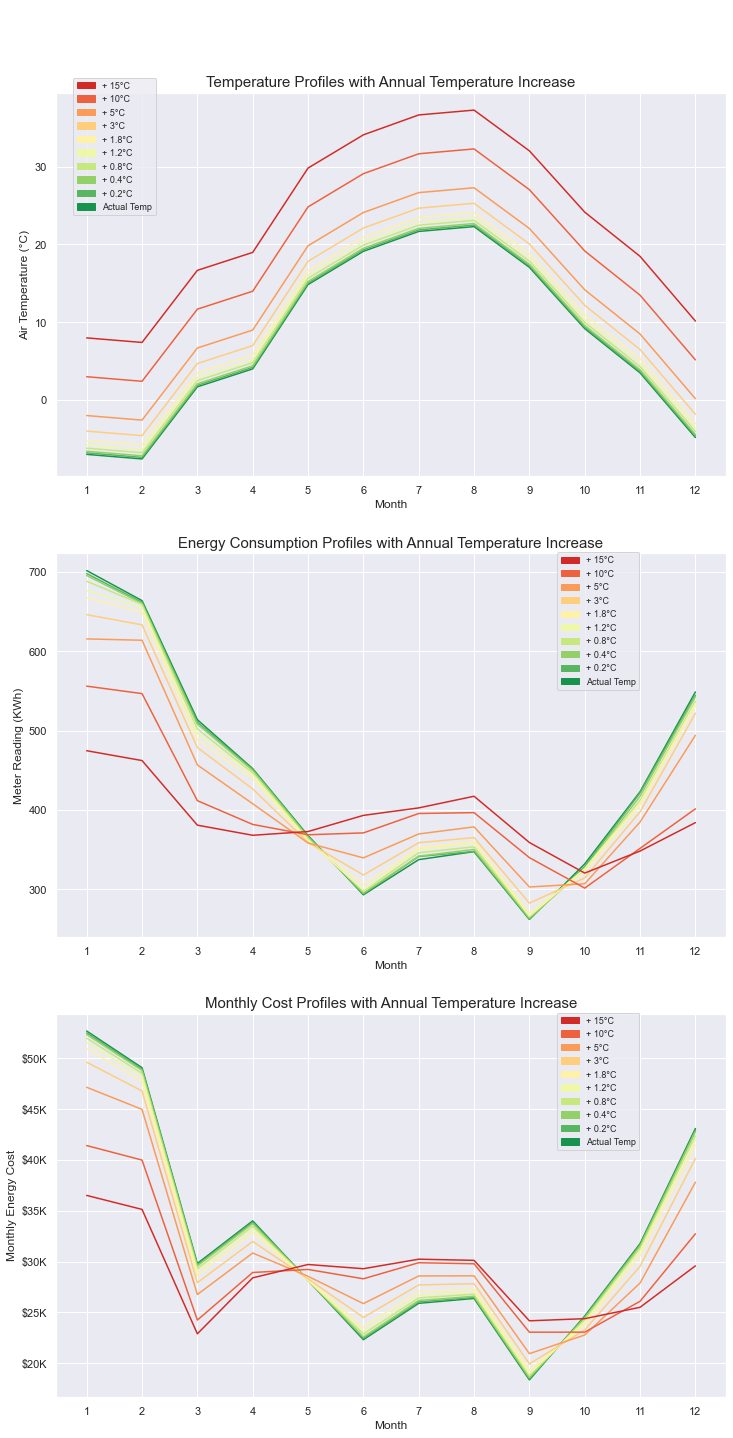

In [669]:
# define a currency method to reformat spending data
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

# plot temperature profile and energy consumption profile
sns.set(rc={"figure.figsize": (12,24)})
f, axes = plt.subplots(3,1)
axes = axes.flatten()
palette = sns.color_palette("RdYlGn_r", 10)
features = ['airTemperature', 'meter_reading', 'spending']
# palette.reverse()

# ax0: create temperature profile with the changes
ax0 = axes[0]
i = 0
for num in range(len(temperature_poschange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').mean()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "airTemperature", ax=ax0, color = palette[i])
    i = i + 1
ax0.set(ylabel='Air Temperature (\xb0C)')
ax0.set_title('Temperature Profiles with Annual Temperature Increase')
    
# ax1: create energy consumption profile with the changes
ax1 = axes[1]
i = 0
for num in range(len(temperature_poschange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').median()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "meter_reading", ax=ax1, color = palette[i])
    i = i + 1
ax1.set(ylabel='Meter Reading (KWh)')
ax1.set_title('Energy Consumption Profiles with Annual Temperature Increase')

# ax1: create spending profile with the changes
ax2 = axes[2]
i = 0
for num in range(len(temperature_poschange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').sum()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "spending", ax=ax2, color = palette[i])
    i = i + 1
ax2.set(ylabel='Monthly Energy Cost')
ax2.set_title('Monthly Cost Profiles with Annual Temperature Increase')
ax2.yaxis.set_major_formatter(currency)

# set x axis label
for ax in axes:
    ax.title.set_size(15)
    ax.set(xlabel='Month')
    ax.set_xticks(range(1, 13))

# set legend
legends = []
for i in range(len(temperature_poschange) - 1, -1, -1):
    if i == 0:
        legend = mpatches.Patch(color=palette[i], label='Actual Temp')
        legends.append(legend)
        continue
        
    label = f"+ {temperature_poschange[i]}\xb0C"
    legend = mpatches.Patch(color=palette[i], label=label)
    legends.append(legend)

#plot legends
f.legend(handles=legends, ncol=1, loc=[0.10, 0.85], fontsize=9)
f.legend(handles=legends, ncol=1, loc=[0.76, 0.52], fontsize=9)
f.legend(handles=legends, ncol=1, loc=[0.76, 0.20], fontsize=9)
f.savefig("..\\figures\\TemperatureEnergyCostProfile1.png", dpi=72, bbox_inches='tight')

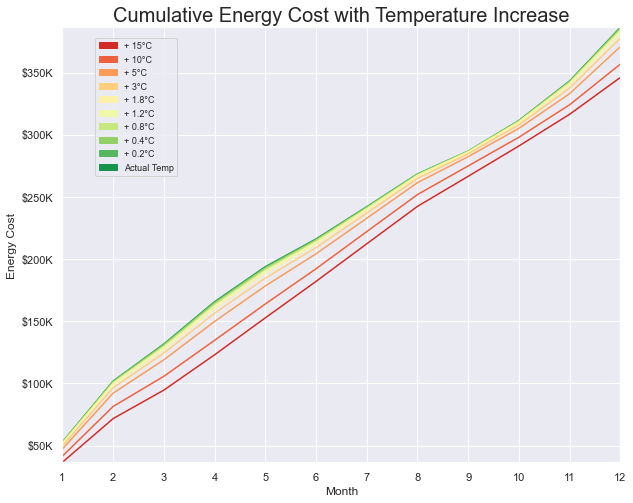

In [670]:
# create cumulative cost plots
x = range(1,13)
y = []

for dataframe in dataframe_summary:
    dataframe = pd.DataFrame(dataframe.groupby('month').sum()['spending']).reset_index()
    dataframe['spending_cum'] = dataframe['spending'].cumsum()
    y.append(dataframe)

# plot data
sns.set(rc={"figure.figsize": (10,8)})
f, axes = plt.subplots()
palette = sns.color_palette("RdYlGn_r", 10)
# palette.reverse()

for num in range(len(temperature_poschange)):
    df = y[num]
    temp_df = pd.DataFrame()
    ax = sns.lineplot(data = df,
             x = "month",
             y = "spending_cum", ax=axes, color = palette[num])
    ax.margins(x=0, y=0)
    
# set labels
axes.set(ylabel='Energy Cost')
axes.set(xlabel='Month')
axes.set_title('Cumulative Energy Cost with Temperature Increase')
axes.title.set_size(20)

# foramt y axis ticks
axes.set_xticks(range(1, 13))
axes.yaxis.set_major_formatter(currency)

# set legend
legends = []
for i in range(len(temperature_poschange) - 1, -1, -1):
    if i == 0:
        legend = mpatches.Patch(color=palette[i], label='Actual Temp')
        legends.append(legend)
        continue
        
    label = f"+ {temperature_poschange[i]}\xb0C"
    legend = mpatches.Patch(color=palette[i], label=label)
    legends.append(legend)

#plot legends
f.legend(handles=legends, ncol=1, loc=[0.15, 0.65], fontsize=9)
f.savefig("..\\figures\\CumEnergyCostProfile1.png", dpi=72, bbox_inches='tight')

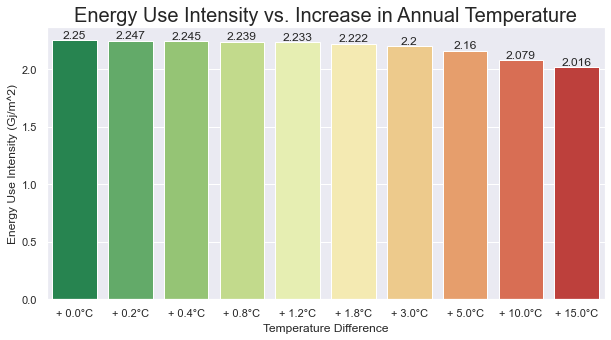

In [671]:
# plot eui data
eui_dataframe = pd.DataFrame({'Temp': temperature_poschange, 'eui': eui})
eui_dataframe['Temp_string'] = "+ " + eui_dataframe.Temp.astype(str) + "\xb0C"

# function to create labels for xaxis
def temp(x, pos):
    s = '+{}'.format(x)
    return s

#plot eui data
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='Temp_string', y='eui', data=eui_dataframe, palette=sns.color_palette("RdYlGn_r", 10))

plt.xlabel('Temperature Difference', size=12)
plt.ylabel('Energy Use Intensity (Gj/m^2)', size=12)
plt.title('Energy Use Intensity vs. Increase in Annual Temperature', size=20)

# set y values in chart
for i in ax.containers:
    ax.bar_label(i, )
    
plt.savefig("..\\figures\\EUI_sc1.png", dpi=72, bbox_inches='tight')

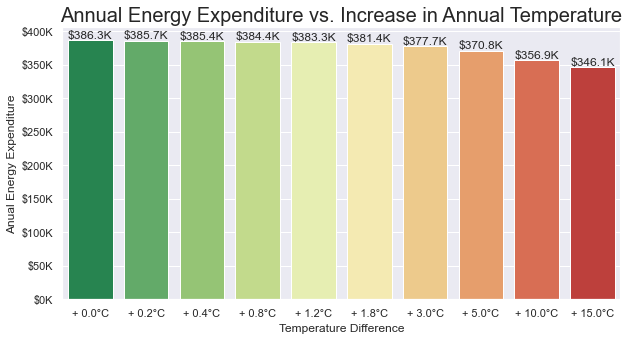

In [672]:
# plot cost data
eui_dataframe['Cost'] = eui_dataframe['eui'] * 6000 * 277.778 * 0.103
eui_dataframe['Cost_str'] = "$" + (round(eui_dataframe['Cost']/1000, 1)).astype(str) + "K"
#plot eui data
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='Temp_string', y='Cost', data=eui_dataframe, palette=sns.color_palette("RdYlGn_r", 10))

plt.xlabel('Temperature Difference', size=12)
plt.ylabel('Anual Energy Expenditure', size=12)
plt.title('Annual Energy Expenditure vs. Increase in Annual Temperature', size=20)
ax.yaxis.set_major_formatter(currency)

# # set y values in chart
# for i in ax.containers:
#     ax.bar_label(i, )

# update y labels
for container, number in zip(ax.containers, eui_dataframe.Cost_str):
    ax.bar_label(container, labels=eui_dataframe.Cost_str)

plt.savefig("..\\figures\\COST_sc1.png", dpi=72, bbox_inches='tight')

### 6.1.2 Scenario 2: Annual Temperature Decrease <a id='6.1.2'></a> 

In [673]:
temperature_negchange = [-x for x in temperature_poschange]
x_profile = []
energy_reading = []
eui = []
total_energy = []
dataframe_summary = []

for num in temperature_negchange:
    X = X_2016.copy()
    X = X.reset_index(drop=True)
    X.airTemperature = X.airTemperature + num
    y_result = best_model.predict(X)
    x_profile.append(X)
    energy_reading.append(y_result)
    eui.append(get_eui(y_result, 6000))
    y = pd.DataFrame(y_result)
    X = X.assign(meter_reading=y.values)
    dataframe_summary.append(X)

In [674]:
# add dollaes into dataframe
for dataframe in dataframe_summary:
    ontraio_energyprice = 0.103
    #
    dataframe['spending'] = dataframe.meter_reading * ontraio_energyprice

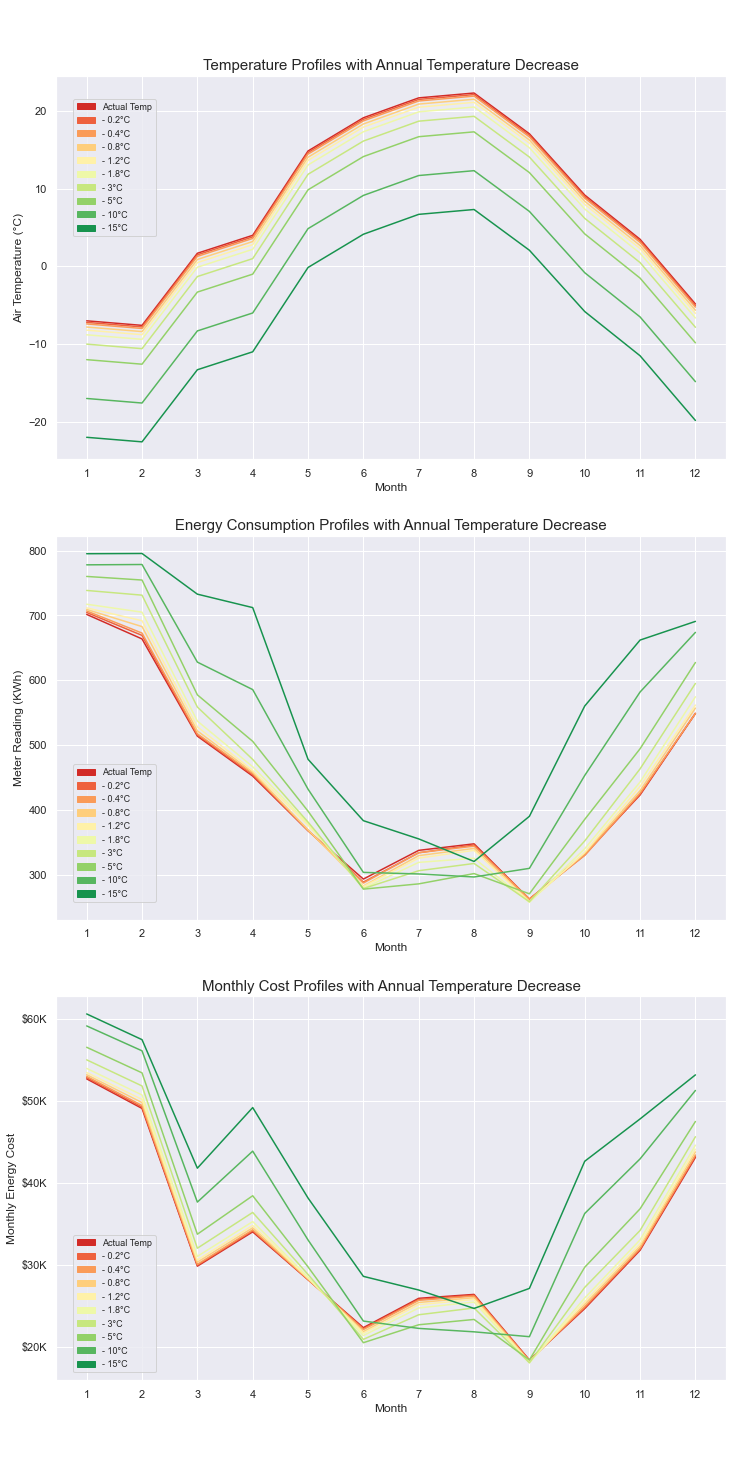

In [675]:
# plot temperature profile and energy consumption profile
sns.set(rc={"figure.figsize": (12,24)})
f, axes = plt.subplots(3,1)
axes = axes.flatten()
palette = sns.color_palette("RdYlGn_r", 10)
features = ['airTemperature', 'meter_reading', 'spending']
palette.reverse()

# ax0: create temperature profile with the changes
ax0 = axes[0]
i = 0
for num in range(len(temperature_negchange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').mean()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "airTemperature", ax=ax0, color = palette[i])
    i = i + 1
ax0.set(ylabel='Air Temperature (\xb0C)')
ax0.set_title('Temperature Profiles with Annual Temperature Decrease')
    
# ax1: create energy consumption profile with the changes
ax1 = axes[1]
i = 0
for num in range(len(temperature_negchange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').median()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "meter_reading", ax=ax1, color = palette[i])
    i = i + 1
ax1.set(ylabel='Meter Reading (KWh)')
ax1.set_title('Energy Consumption Profiles with Annual Temperature Decrease')

# ax1: create spending profile with the changes
ax2 = axes[2]
i = 0
for num in range(len(temperature_negchange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').sum()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "spending", ax=ax2, color = palette[i])
    i = i + 1
ax2.set(ylabel='Monthly Energy Cost')
ax2.set_title('Monthly Cost Profiles with Annual Temperature Decrease')
ax2.yaxis.set_major_formatter(currency)

# set x axis label
for ax in axes:
    ax.title.set_size(15)
    ax.set(xlabel='Month')
    ax.set_xticks(range(1, 13))

# set legend
legends = []
for i in range(len(temperature_poschange)):
    if i == 0:
        legend = mpatches.Patch(color=palette[i], label='Actual Temp')
        legends.append(legend)
        continue
        
    label = f"- {temperature_poschange[i]}\xb0C"
    legend = mpatches.Patch(color=palette[i], label=label)
    legends.append(legend)

#plot legends
f.legend(handles=legends, ncol=1, loc=[0.10, 0.84], fontsize=9)
f.legend(handles=legends, ncol=1, loc=[0.10, 0.39], fontsize=9)
f.legend(handles=legends, ncol=1, loc=[0.10, 0.072], fontsize=9)
f.savefig("..\\figures\\TemperatureEnergyCostProfile2.png", dpi=72, bbox_inches='tight')

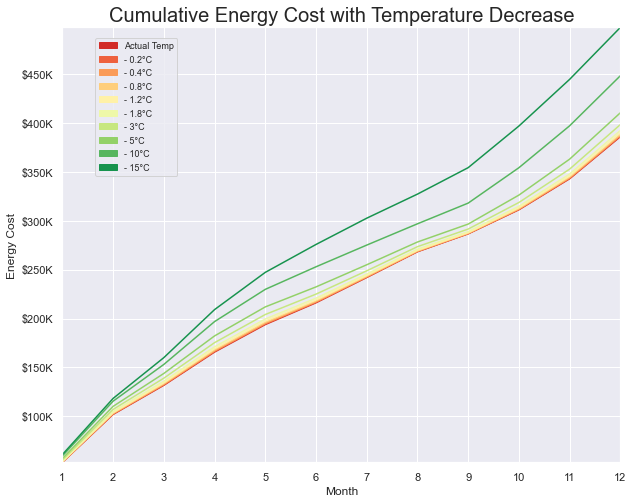

In [676]:
# create cumulative cost plots
x = range(1,13)
y = []

for dataframe in dataframe_summary:
    dataframe = pd.DataFrame(dataframe.groupby('month').sum()['spending']).reset_index()
    dataframe['spending_cum'] = dataframe['spending'].cumsum()
    y.append(dataframe)

# plot data
sns.set(rc={"figure.figsize": (10,8)})
f, axes = plt.subplots()
palette = sns.color_palette("RdYlGn_r", 10)
palette.reverse()

for num in range(len(temperature_poschange)):
    df = y[num]
    temp_df = pd.DataFrame()
    ax = sns.lineplot(data = df,
             x = "month",
             y = "spending_cum", ax=axes, color = palette[num])
    ax.margins(x=0, y=0)
    
# set labels
axes.set(ylabel='Energy Cost')
axes.set(xlabel='Month')
axes.set_title('Cumulative Energy Cost with Temperature Decrease')
axes.title.set_size(20)

# foramt y axis ticks
axes.set_xticks(range(1, 13))
axes.yaxis.set_major_formatter(currency)

# set legend
legends = []
for i in range(len(temperature_poschange)):
    if i == 0:
        legend = mpatches.Patch(color=palette[i], label='Actual Temp')
        legends.append(legend)
        continue
        
    label = f"- {temperature_poschange[i]}\xb0C"
    legend = mpatches.Patch(color=palette[i], label=label)
    legends.append(legend)

#plot legends
f.legend(handles=legends, ncol=1, loc=[0.15, 0.65], fontsize=9)
f.savefig("..\\figures\\CumEnergyCostProfile2.png", dpi=72, bbox_inches='tight')

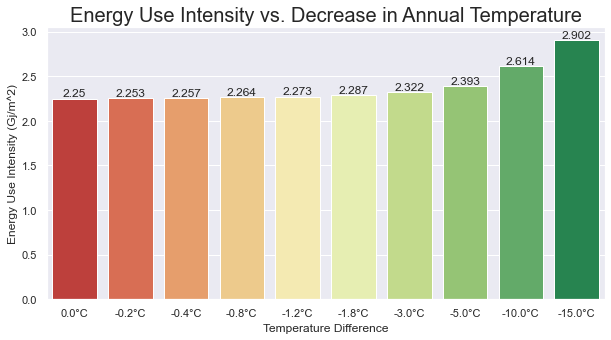

In [677]:
# plot eui data
eui_dataframe = pd.DataFrame({'Temp': temperature_negchange, 'eui': eui})
eui_dataframe['Temp_string'] = eui_dataframe.Temp.astype(str) + "\xb0C"

# function to create labels for xaxis
def temp(x, pos):
    s = '+{}'.format(x)
    return s


#plot eui data
palette = sns.color_palette("RdYlGn_r", 10)
palette.reverse()
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='Temp_string', y='eui', 
                 data=eui_dataframe, 
                 palette=palette)

plt.xlabel('Temperature Difference', size=12)
plt.ylabel('Energy Use Intensity (Gj/m^2)', size=12)
plt.title('Energy Use Intensity vs. Decrease in Annual Temperature', size=20)

# set y values in chart
for i in ax.containers:
    ax.bar_label(i, )
    
plt.savefig("..\\figures\\EUI_sc2png", dpi=72, bbox_inches='tight')

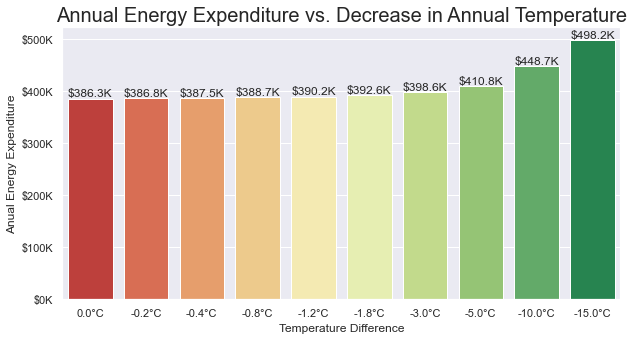

In [678]:
# plot cost data
eui_dataframe['Cost'] = eui_dataframe['eui'] * 6000 * 277.778 * 0.103
eui_dataframe['Cost_str'] = "$" + (round(eui_dataframe['Cost']/1000, 1)).astype(str) + "K"

#plot eui data
palette = sns.color_palette("RdYlGn_r", 10)
palette.reverse()
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='Temp_string', y='Cost', 
                 data=eui_dataframe, 
                 palette=palette)

plt.xlabel('Temperature Difference', size=12)
plt.ylabel('Anual Energy Expenditure', size=12)
plt.title('Annual Energy Expenditure vs. Decrease in Annual Temperature', size=20)
ax.yaxis.set_major_formatter(currency)

# # set y values in chart
# for i in ax.containers:
#     ax.bar_label(i, )

# update y labels
for container, number in zip(ax.containers, eui_dataframe.Cost_str):
    ax.bar_label(container, labels=eui_dataframe.Cost_str)

plt.savefig("..\\figures\\COST_sc2.png", dpi=72, bbox_inches='tight')

### 6.1.3 Scenario 3: Temperature Change by Seasons <a id='6.1.3'></a> 

In [679]:
temperature_change = temperature_poschange

x_profile = []
energy_reading = []
eui = []
total_energy = []
dataframe_summary = []

# months of seaons
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
fall = [9, 10, 11]

# change applied base on season
for num in temperature_change:
    X = X_2016.copy()
    X = X.reset_index(drop=True)
    # condition applied to seasonal data
    X.airTemperature = np.where((X['month'] >= 3) & (X['month'] <= 8), 
                                X.airTemperature + num, 
                                X.airTemperature - num)
    y_result = best_model.predict(X)
    x_profile.append(X)
    energy_reading.append(y_result)
    eui.append(get_eui(y_result, 6000))
    y = pd.DataFrame(y_result)
    X = X.assign(meter_reading=y.values)
    dataframe_summary.append(X)

In [680]:
for dataframe in dataframe_summary:
    ontraio_energyprice = 0.103
    #
    dataframe['spending'] = dataframe.meter_reading * ontraio_energyprice

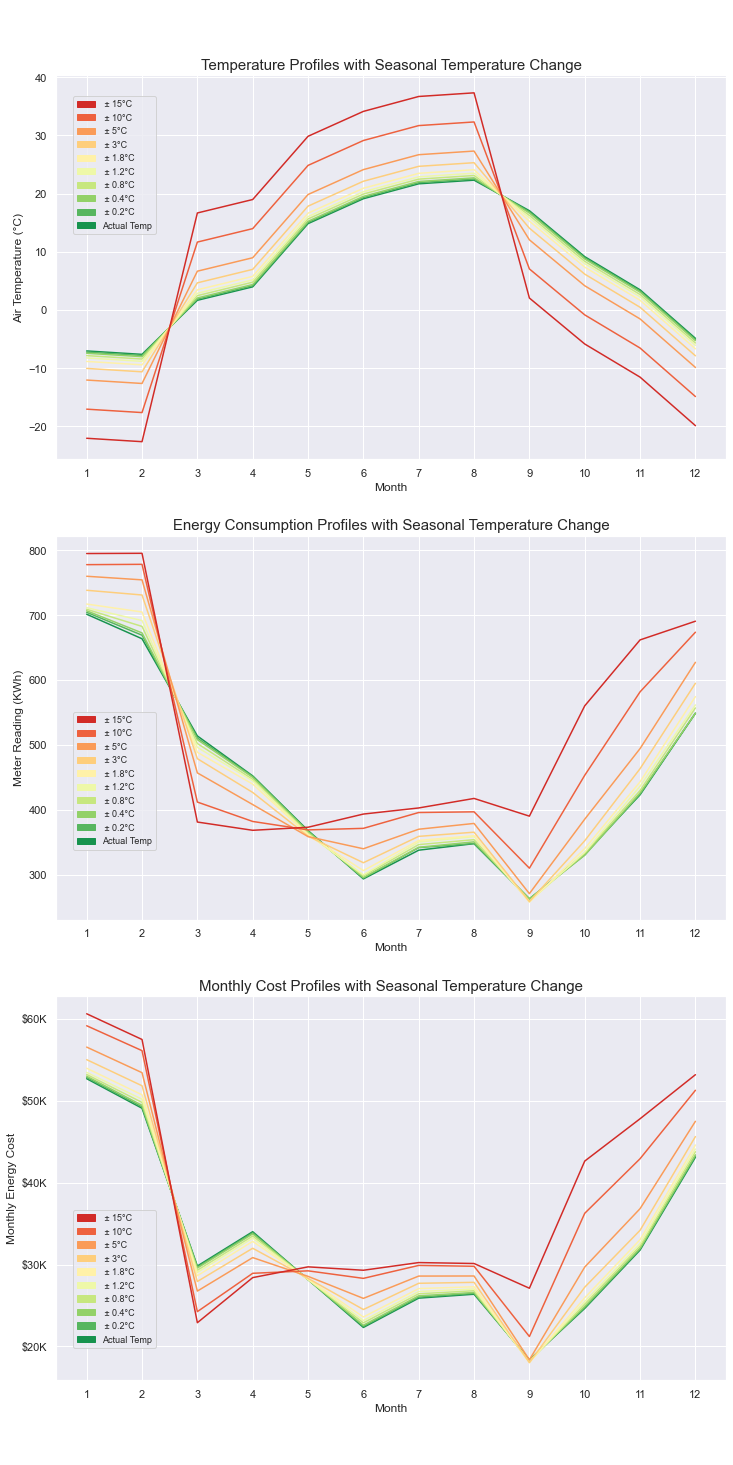

In [681]:
# plot temperature profile and energy consumption profile
sns.set(rc={"figure.figsize": (12,24)})
f, axes = plt.subplots(3,1)
axes = axes.flatten()
palette = sns.color_palette("RdYlGn_r", 10)
features = ['airTemperature', 'meter_reading', 'spending']
#palette.reverse()

# ax0: create temperature profile with the changes
ax0 = axes[0]
i = 0
for num in range(len(temperature_negchange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').mean()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "airTemperature", ax=ax0, color = palette[i])
    i = i + 1
ax0.set(ylabel='Air Temperature (\xb0C)')
ax0.set_title('Temperature Profiles with Seasonal Temperature Change')
    
# ax1: create energy consumption profile with the changes
ax1 = axes[1]
i = 0
for num in range(len(temperature_negchange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').median()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "meter_reading", ax=ax1, color = palette[i])
    i = i + 1
ax1.set(ylabel='Meter Reading (KWh)')
ax1.set_title('Energy Consumption Profiles with Seasonal Temperature Change')

# ax1: create spending profile with the changes
ax2 = axes[2]
i = 0
for num in range(len(temperature_negchange)):
    df = pd.DataFrame(dataframe_summary[num].groupby('month').sum()[features]).reset_index()
    temp_df = pd.DataFrame()
    sns.lineplot(data = df,
             x = "month",
             y = "spending", ax=ax2, color = palette[i])
    i = i + 1
ax2.set(ylabel='Monthly Energy Cost')
ax2.set_title('Monthly Cost Profiles with Seasonal Temperature Change')
ax2.yaxis.set_major_formatter(currency)

# set x axis label
for ax in axes:
    ax.title.set_size(15)
    ax.set(xlabel='Month')
    ax.set_xticks(range(1, 13))

# set legend
legends = []
for i in range(len(temperature_poschange)-1, -1, -1):
    if i == 0:
        legend = mpatches.Patch(color=palette[i], label='Actual Temp')
        legends.append(legend)
        continue
        
    label = f" ± {temperature_poschange[i]}\xb0C"
    legend = mpatches.Patch(color=palette[i], label=label)
    legends.append(legend)

#plot legends
f.legend(handles=legends, ncol=1, loc=[0.10, 0.84], fontsize=9)
f.legend(handles=legends, ncol=1, loc=[0.10, 0.42], fontsize=9)
f.legend(handles=legends, ncol=1, loc=[0.10, 0.08], fontsize=9)
f.savefig("..\\figures\\TemperatureEnergyCostProfile3.png", dpi=72, bbox_inches='tight')

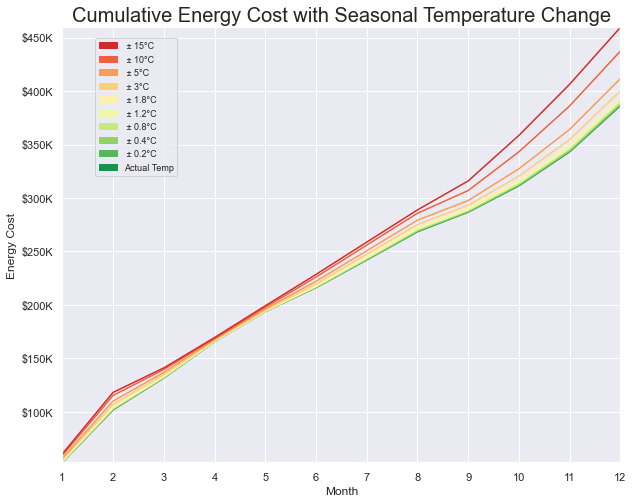

In [682]:
# create cumulative cost plots
x = range(1,13)
y = []

for dataframe in dataframe_summary:
    dataframe = pd.DataFrame(dataframe.groupby('month').sum()['spending']).reset_index()
    dataframe['spending_cum'] = dataframe['spending'].cumsum()
    y.append(dataframe)

# plot data
sns.set(rc={"figure.figsize": (10,8)})
f, axes = plt.subplots()
palette = sns.color_palette("RdYlGn_r", 10)
#palette.reverse()

for num in range(len(temperature_poschange)):
    df = y[num]
    temp_df = pd.DataFrame()
    ax = sns.lineplot(data = df,
             x = "month",
             y = "spending_cum", ax=axes, color = palette[num])
    ax.margins(x=0, y=0)
    
# set labels
axes.set(ylabel='Energy Cost')
axes.set(xlabel='Month')
axes.set_title('Cumulative Energy Cost with Seasonal Temperature Change')
axes.title.set_size(20)

# foramt y axis ticks
axes.set_xticks(range(1, 13))
axes.yaxis.set_major_formatter(currency)

# set legend
legends = []
for i in range(len(temperature_poschange)-1, -1, -1):
    if i == 0:
        legend = mpatches.Patch(color=palette[i], label='Actual Temp')
        legends.append(legend)
        continue
        
    label = f" ± {temperature_poschange[i]}\xb0C"
    legend = mpatches.Patch(color=palette[i], label=label)
    legends.append(legend)

#plot legends
f.legend(handles=legends, ncol=1, loc=[0.15, 0.65], fontsize=9)
f.savefig("..\\figures\\CumEnergyCostProfile2.png", dpi=72, bbox_inches='tight')

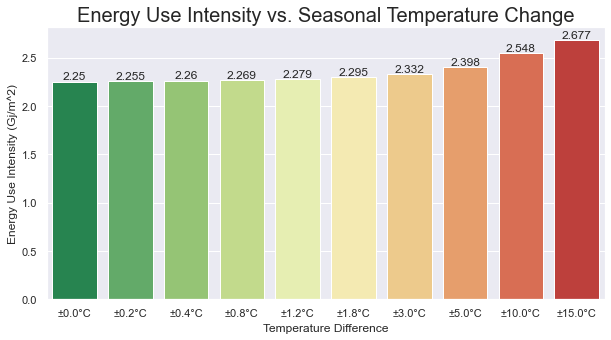

In [683]:
# plot eui data
eui_dataframe = pd.DataFrame({'Temp': temperature_change, 'eui': eui})
eui_dataframe['Temp_string'] = "±" + eui_dataframe.Temp.astype(str) + "\xb0C"

# function to create labels for xaxis
def temp(x, pos):
    s = '+{}'.format(x)
    return s


#plot eui data
palette = sns.color_palette("RdYlGn_r", 10)
#palette.reverse()
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='Temp_string', y='eui', 
                 data=eui_dataframe, 
                 palette=palette)

plt.xlabel('Temperature Difference', size=12)
plt.ylabel('Energy Use Intensity (Gj/m^2)', size=12)
plt.title('Energy Use Intensity vs. Seasonal Temperature Change', size=20)

# set y values in chart
for i in ax.containers:
    ax.bar_label(i, )
    
plt.savefig("..\\figures\\EUI_sc3.png", dpi=72, bbox_inches='tight')

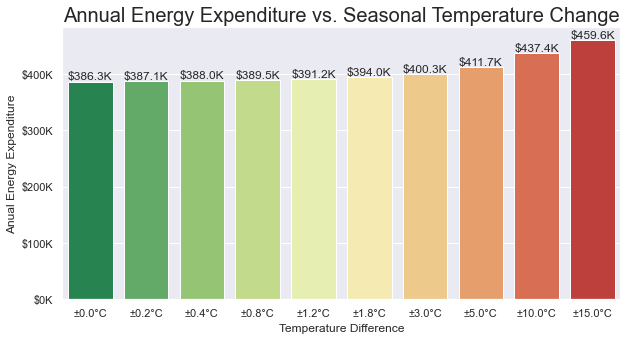

In [684]:
# plot cost data
eui_dataframe['Cost'] = eui_dataframe['eui'] * 6000 * 277.778 * 0.103
eui_dataframe['Cost_str'] = "$" + (round(eui_dataframe['Cost']/1000, 1)).astype(str) + "K"

#plot eui data
palette = sns.color_palette("RdYlGn_r", 10)
#palette.reverse()
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='Temp_string', y='Cost', 
                 data=eui_dataframe, 
                 palette=palette)

plt.xlabel('Temperature Difference', size=12)
plt.ylabel('Anual Energy Expenditure', size=12)
plt.title('Annual Energy Expenditure vs. Seasonal Temperature Change', size=20)
ax.yaxis.set_major_formatter(currency)

# # set y values in chart
# for i in ax.containers:
#     ax.bar_label(i, )

# update y labels
for container, number in zip(ax.containers, eui_dataframe.Cost_str):
    ax.bar_label(container, labels=eui_dataframe.Cost_str)

plt.savefig("..\\figures\\COST_sc3.png", dpi=72, bbox_inches='tight')